         Comprehensive Fitness and Health Tracking    Dataset
    (lifestyle + physiological + behavioral factors that can   uncover several health & fitness trends)
Fitness and Health Tracking Dataset provides a comprehensive collection of daily health metrics for a variety of users over a five-year period.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno as msno 
from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

FILE IMPORTING TO CREATE A DATAFRAME AND SUMMARY OF THE DATA SET

In [2]:
df = pd.read_excel(r'C:\Users\mkiarie\Desktop\gitprojects\data sets\Fitness_Health_Tracking_Dataset_with_Missing_Values.xlsx')

print(df.head())   #show the colomns

   User_ID      Full Name       Date  Age  Gender  Height (cm)  Weight (kg)  \
0        1  Sara Martinez 2023-01-01   19  Female          191           80   
1        1  Sara Martinez 2023-01-02   19  Female          191           80   
2        1  Sara Martinez 2023-01-03   19  Female          191           80   
3        1  Sara Martinez 2023-01-04   19  Female          191           80   
4        1  Sara Martinez 2023-01-05   19  Female          191           80   

   Steps_Taken  Calories_Burned  Hours_Slept  Water_Intake (Liters)  \
0        11405             1862     7.021201               3.440508   
1         7010             1806          NaN               3.103590   
2        18942             2274     8.167817               3.814843   
3        13778             2656     7.453552               3.508636   
4        10247             3571     5.132654                    NaN   

   Active_Minutes  Heart_Rate (bpm) Workout_Type  Stress_Level (1-10)     Mood  
0            80.0

In [3]:
print(df.info())  #shows the no of rows&columns column-names datatypes spot missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36500 entries, 0 to 36499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   User_ID                36500 non-null  int64         
 1   Full Name              36500 non-null  object        
 2   Date                   36500 non-null  datetime64[ns]
 3   Age                    36500 non-null  int64         
 4   Gender                 36500 non-null  object        
 5   Height (cm)            36500 non-null  int64         
 6   Weight (kg)            36500 non-null  int64         
 7   Steps_Taken            36500 non-null  int64         
 8   Calories_Burned        36500 non-null  int64         
 9   Hours_Slept            32841 non-null  float64       
 10  Water_Intake (Liters)  31099 non-null  float64       
 11  Active_Minutes         34633 non-null  float64       
 12  Heart_Rate (bpm)       34668 non-null  float64       
 13  W

In [4]:
print(df.describe())  #shows summary statistics(count mean SD min median)

            User_ID                           Date           Age  \
count  36500.000000                          36500  36500.000000   
mean      50.500000  2023-07-02 00:00:00.000000256     43.160000   
min        1.000000            2023-01-01 00:00:00     19.000000   
25%       25.750000            2023-04-02 00:00:00     29.000000   
50%       50.500000            2023-07-02 00:00:00     44.000000   
75%       75.250000            2023-10-01 00:00:00     56.250000   
max      100.000000            2023-12-31 00:00:00     63.000000   
std       28.866465                            NaN     13.674046   

        Height (cm)   Weight (kg)   Steps_Taken  Calories_Burned  \
count  36500.000000  36500.000000  36500.000000     36500.000000   
mean     172.690000     85.830000  11035.111973      2747.735452   
min      150.000000     51.000000   2000.000000      1500.000000   
25%      160.000000     68.000000   6522.750000      2119.000000   
50%      173.000000     86.000000  11042.000000

In [5]:
# DATASET SHAPE
print(df.shape)

(36500, 16)


DATA CLEANING AND PREPROSSESING

User_ID                     0
Full Name                   0
Date                        0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Steps_Taken                 0
Calories_Burned             0
Hours_Slept              3659
Water_Intake (Liters)    5401
Active_Minutes           1867
Heart_Rate (bpm)         1832
Workout_Type             9192
Stress_Level (1-10)         0
Mood                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36500 entries, 0 to 36499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   User_ID                36500 non-null  int64         
 1   Full Name              36500 non-null  object        
 2   Date                   36500 non-null  datetime64[ns]
 3   Age                    36500 non-null  int64         
 4   Gender                 36500 non-null  

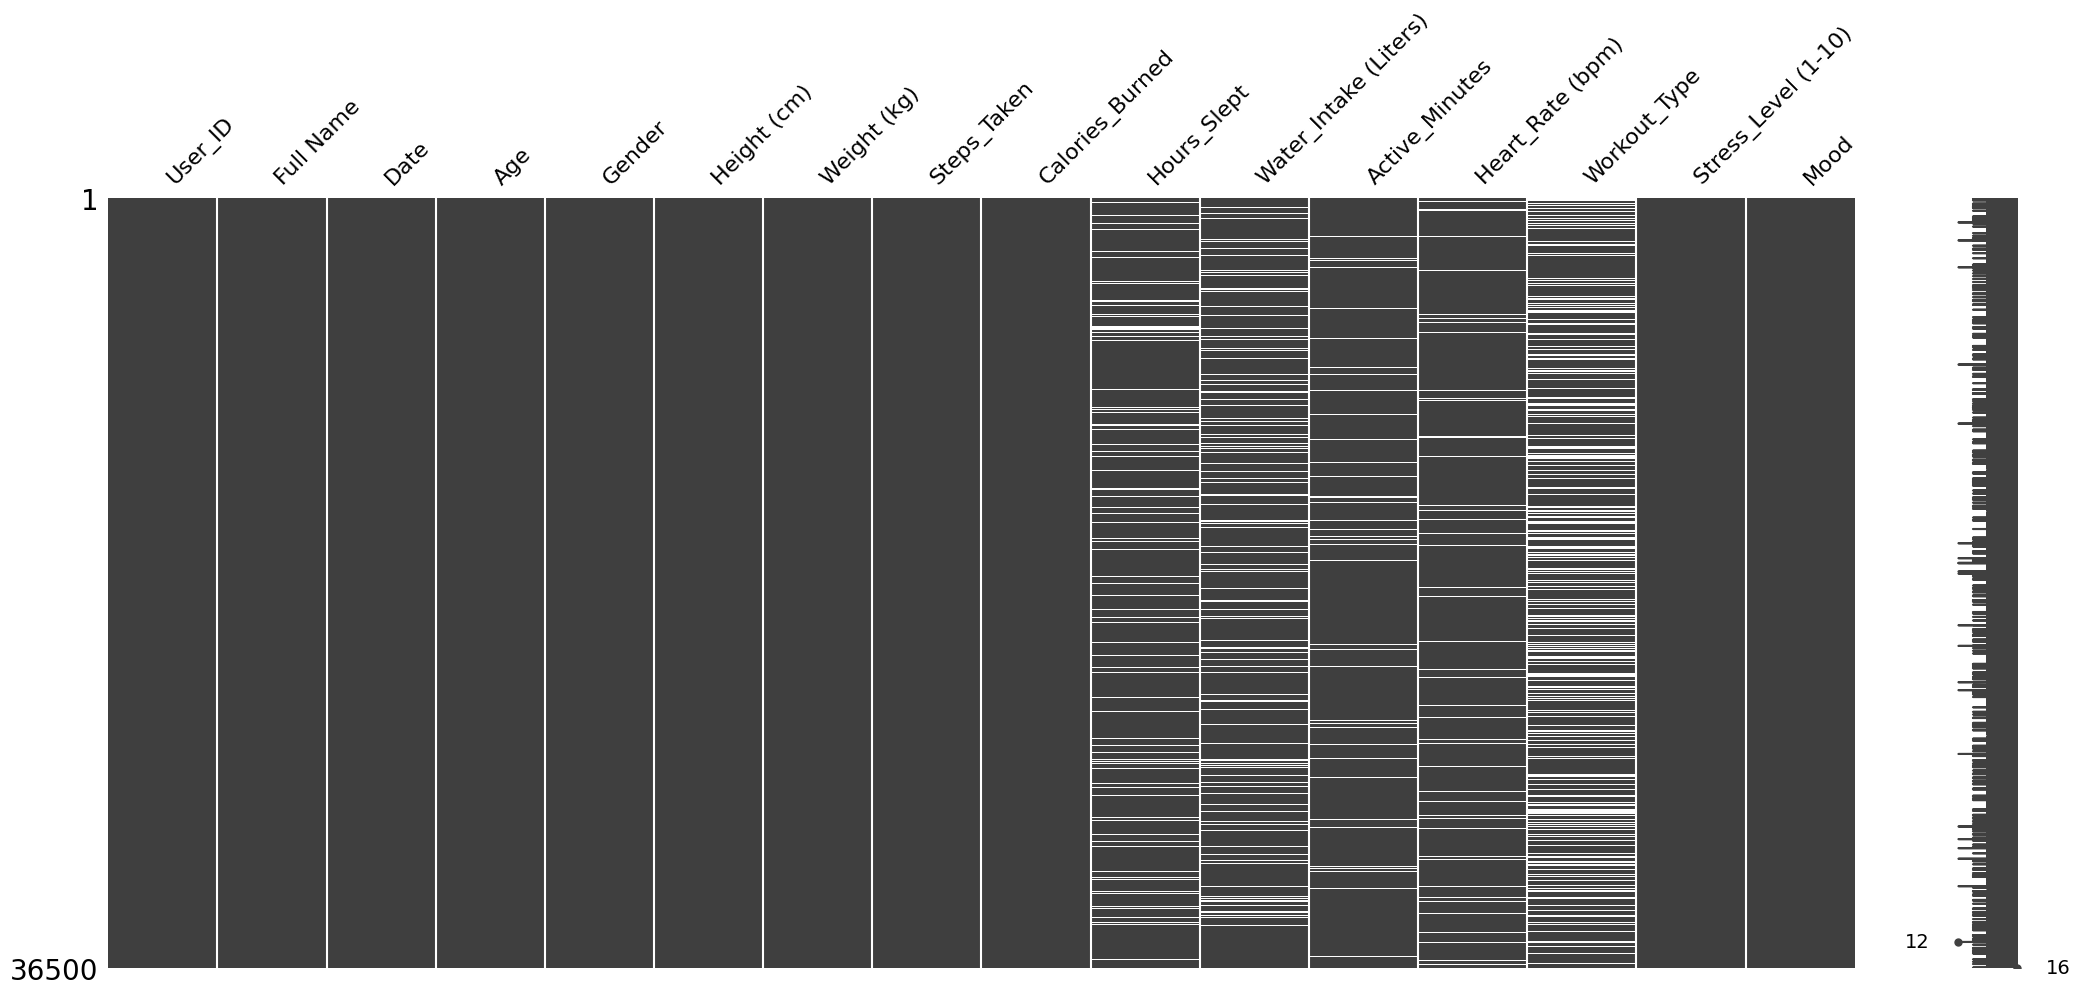

In [6]:
#HANDLING MISSING DATA 
#CHECKING MISSING DATA

print(df.isnull().sum())
print(df.info())

msno.matrix(df)   #Matrix plot
plt.show()

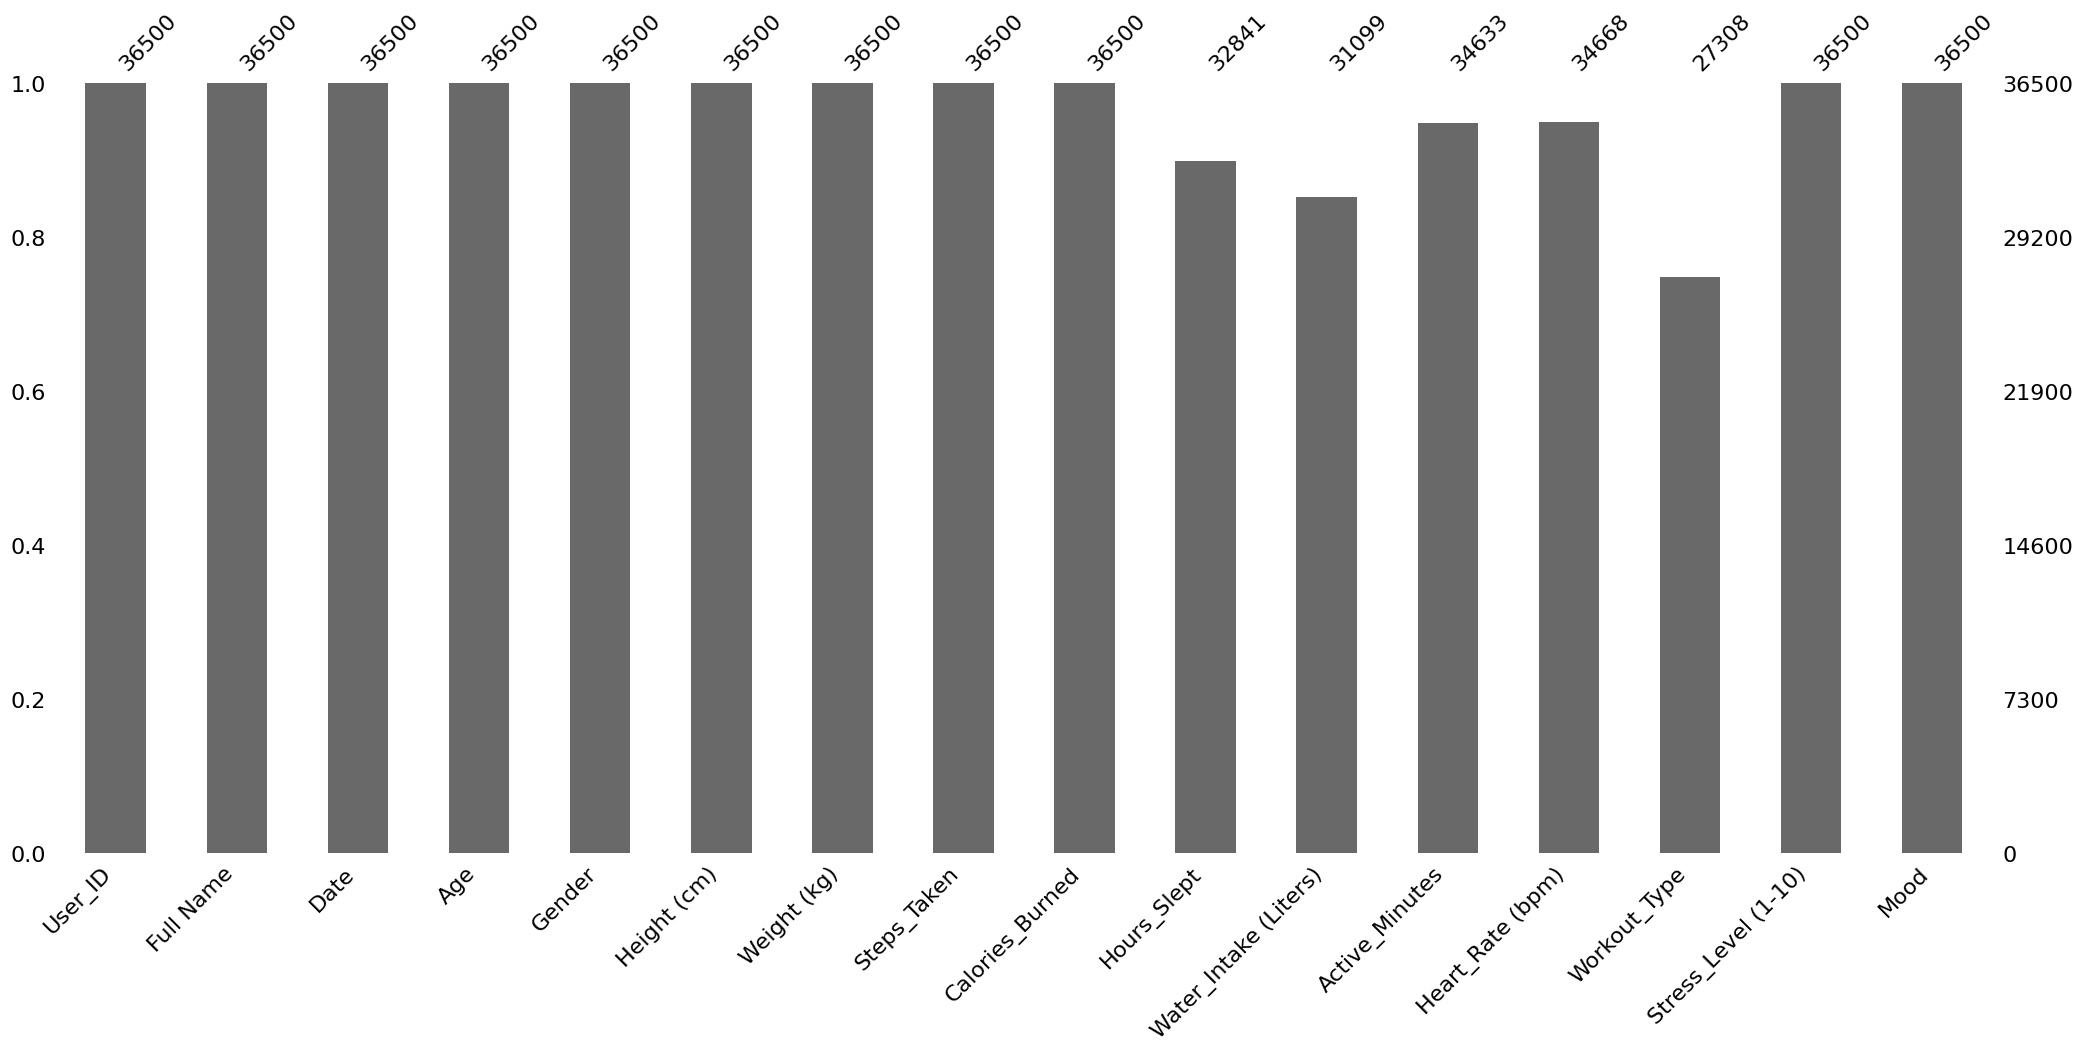

In [7]:
msno.bar(df)  #barplot
plt.show()

The visual pattern in the matrix, with large contiguous blocks of missing data across multiple related columns, strongly suggests that the missingness is not entirely random and is likely influenced by some underlying factors, making MNAR or MAR the more probable types of missingness.
Since the missingness is related to the missing values themselves, you can’t just drop or simply impute.
In the dataset the there missing 1 object(workout type) the other 4 are numerical(Hours_slept,water intake, active_min and heartrate)
We can use mean or KNN IMPUTER for the numerical values and 'missing' for the categorical values

In [8]:
df.columns.tolist()

['User_ID',
 'Full Name',
 'Date',
 'Age',
 'Gender',
 'Height (cm)',
 'Weight (kg)',
 'Steps_Taken',
 'Calories_Burned',
 'Hours_Slept',
 'Water_Intake (Liters)',
 'Active_Minutes',
 'Heart_Rate (bpm)',
 'Workout_Type',
 'Stress_Level (1-10)',
 'Mood']

In [9]:
# handling numerical missing values
# Using KNNIMPUTER

knn_imputer = KNNImputer(n_neighbors=5)

df[['Hours_Slept', 'Water_Intake (Liters)', 'Active_Minutes', 'Heart_Rate (bpm)',]] = knn_imputer.fit_transform(df[['Hours_Slept', 'Water_Intake (Liters)', 'Active_Minutes', 'Heart_Rate (bpm)']])

In [10]:
df.isnull().sum()

User_ID                     0
Full Name                   0
Date                        0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Steps_Taken                 0
Calories_Burned             0
Hours_Slept                 0
Water_Intake (Liters)       0
Active_Minutes              0
Heart_Rate (bpm)            0
Workout_Type             9192
Stress_Level (1-10)         0
Mood                        0
dtype: int64

In [11]:
#handling the categorical missing values 
# impute missing for the workout type column

df['Workout_Type'] = df['Workout_Type'].fillna('Missing')


In [12]:
df['Workout_Type'].value_counts(dropna=False)

Workout_Type
Yoga        9222
Missing     9192
Cardio      9048
Strength    9038
Name: count, dtype: int64

Check for ouliers and duplicates

In [13]:
#duplicates check

print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [14]:
#outliers check

for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    Upper_bound = Q3 + 1.5 * IQR 
    
    outliers = df[(df[col]<lower_bound) | (df[col]>Upper_bound)]
    
    print(f"{col}: {outliers.shape[0]} outliers")

User_ID: 0 outliers
Age: 0 outliers
Height (cm): 0 outliers
Weight (kg): 0 outliers
Steps_Taken: 0 outliers
Calories_Burned: 0 outliers
Hours_Slept: 0 outliers
Water_Intake (Liters): 0 outliers
Active_Minutes: 0 outliers
Heart_Rate (bpm): 0 outliers
Stress_Level (1-10): 0 outliers


In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)


Index(['User_ID', 'Age', 'Height (cm)', 'Weight (kg)', 'Steps_Taken',
       'Calories_Burned', 'Hours_Slept', 'Water_Intake (Liters)',
       'Active_Minutes', 'Heart_Rate (bpm)', 'Stress_Level (1-10)'],
      dtype='object')


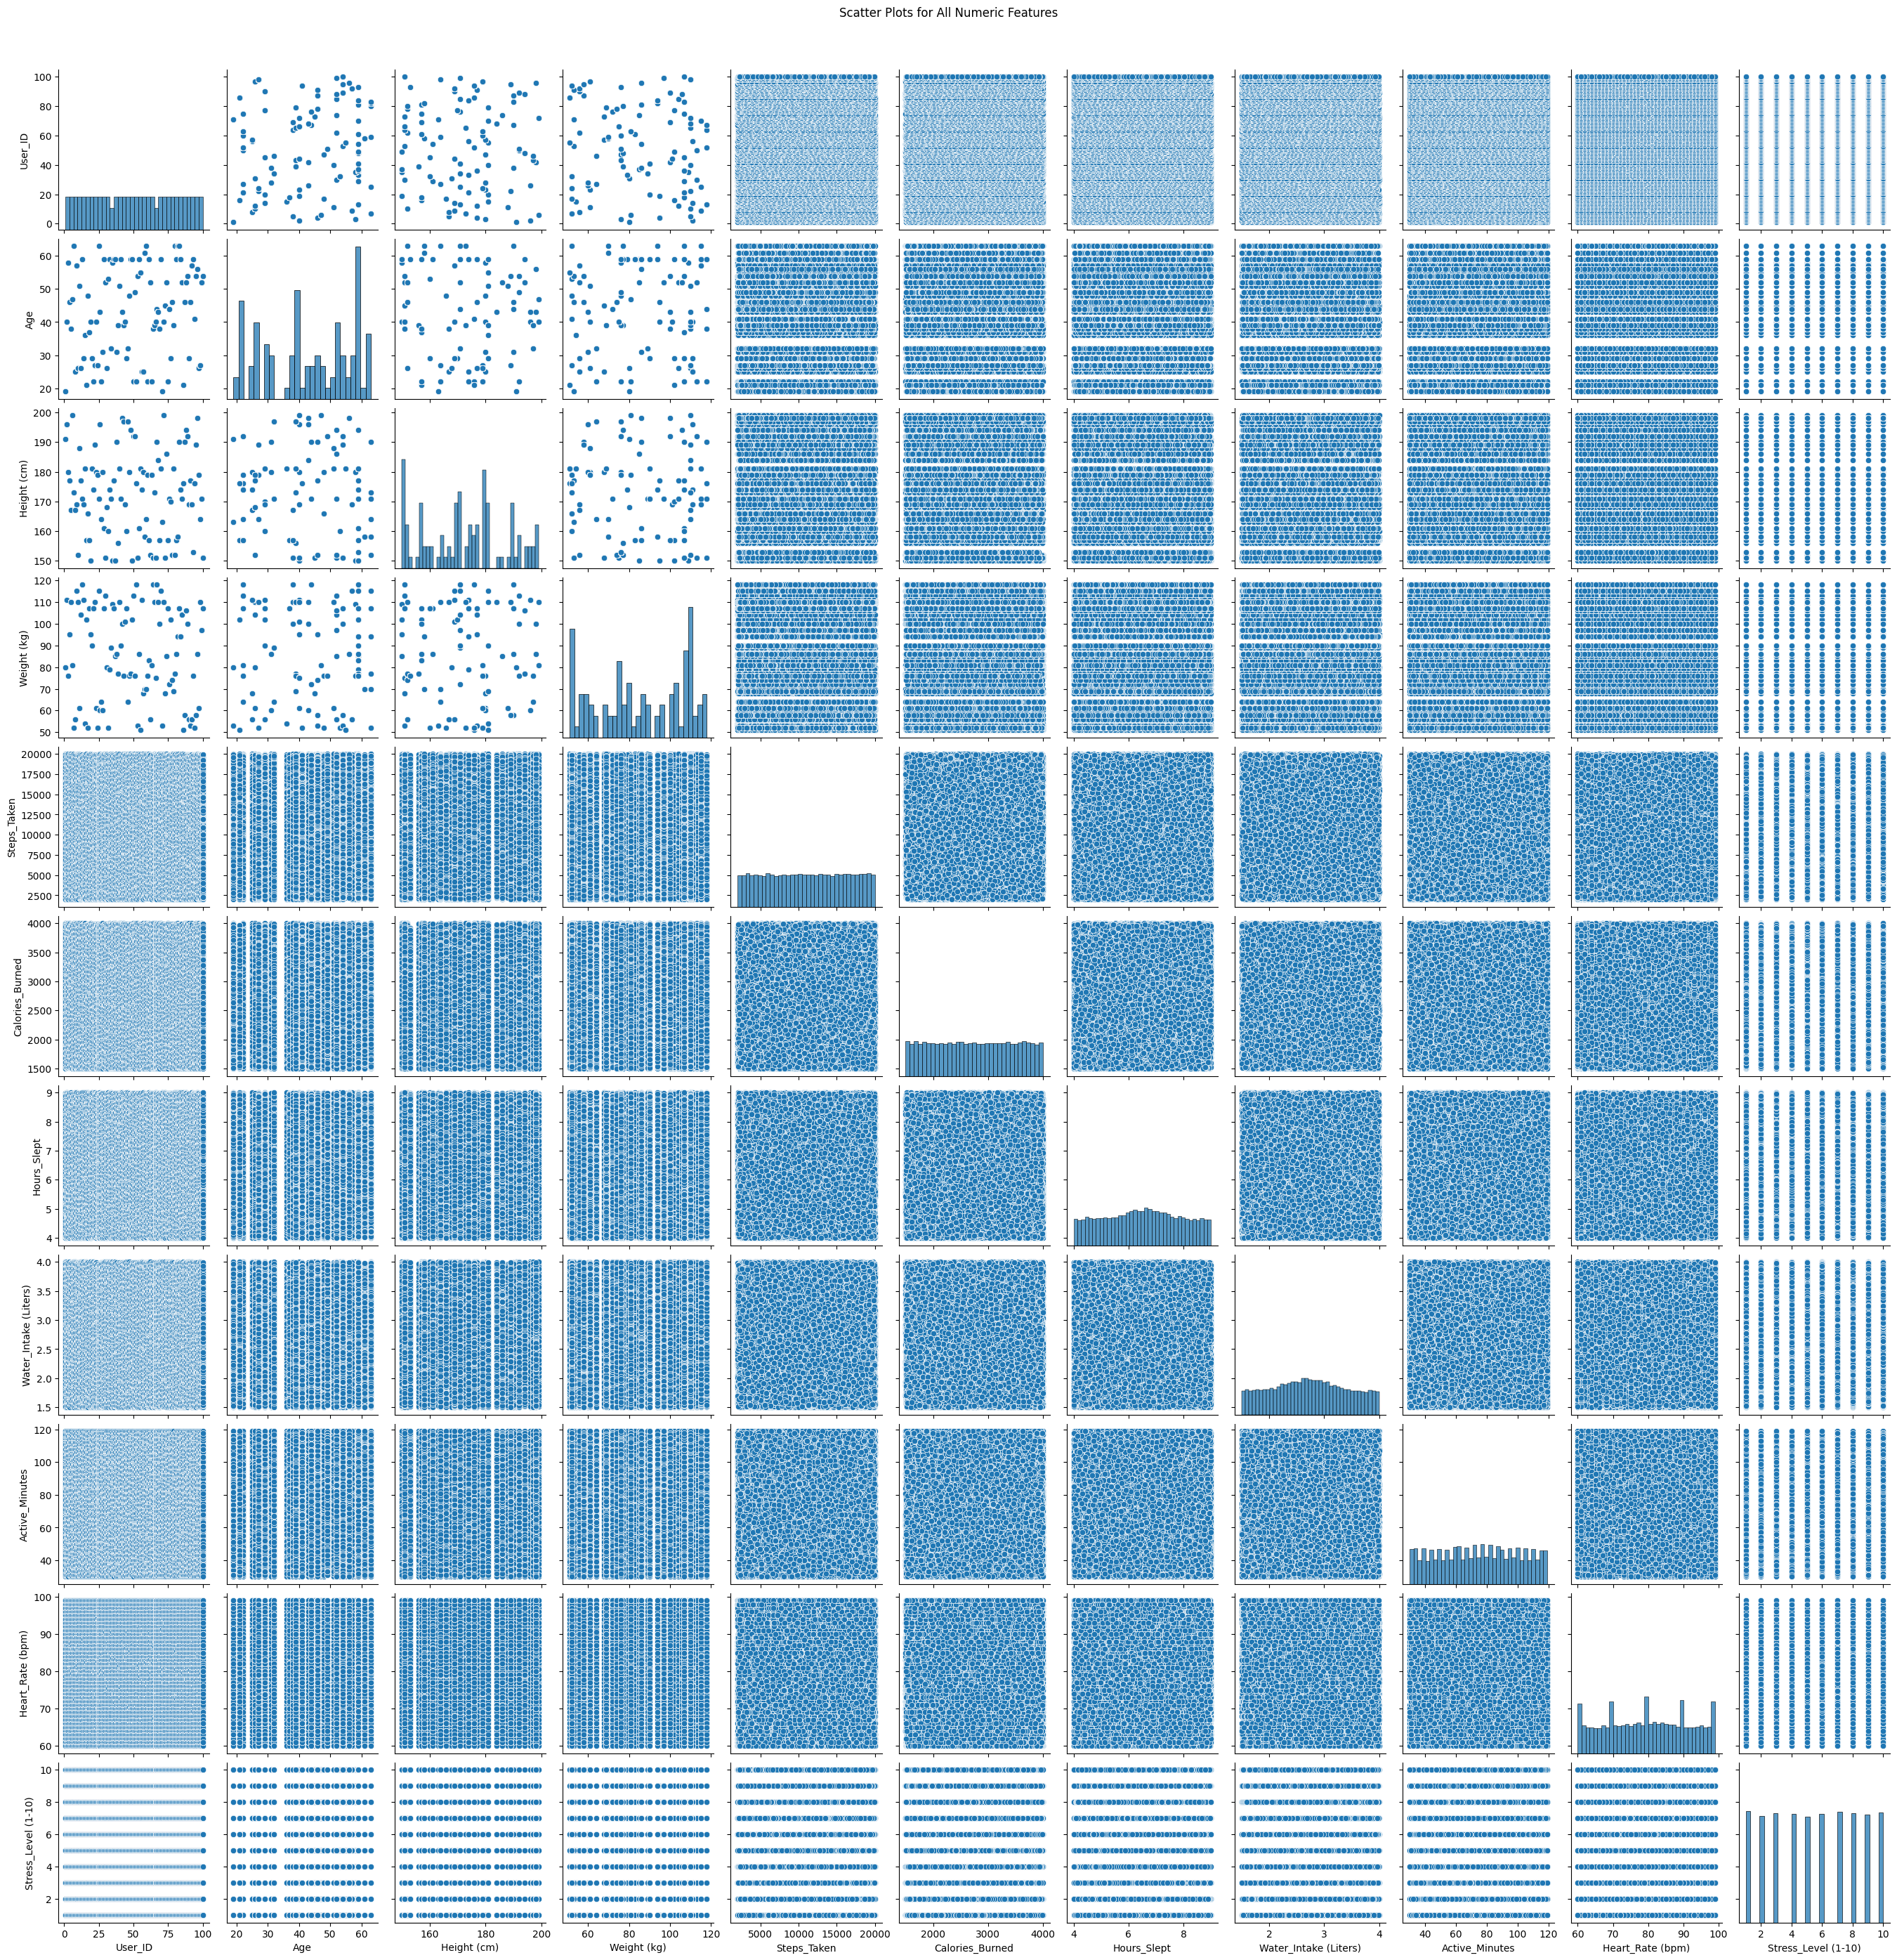

In [16]:
sns.pairplot(df[numeric_cols])
plt.suptitle("Scatter Plots for All Numeric Features", y=1.02)
plt.show()


  UNIVARIATE ANALYSIS
Analyzing a single variable/column at a time.

C:\Users\mkiarie\AppData\Local\Temp\ipykernel_33808\2861843806.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Hours_Slept'], shade=True, color="blue")


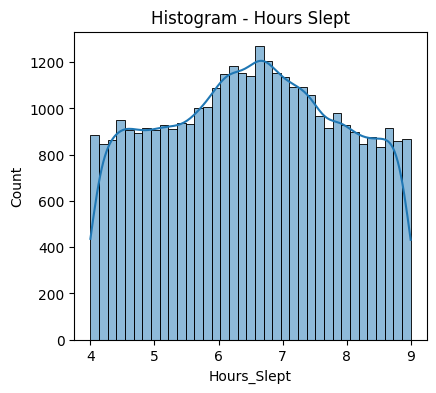

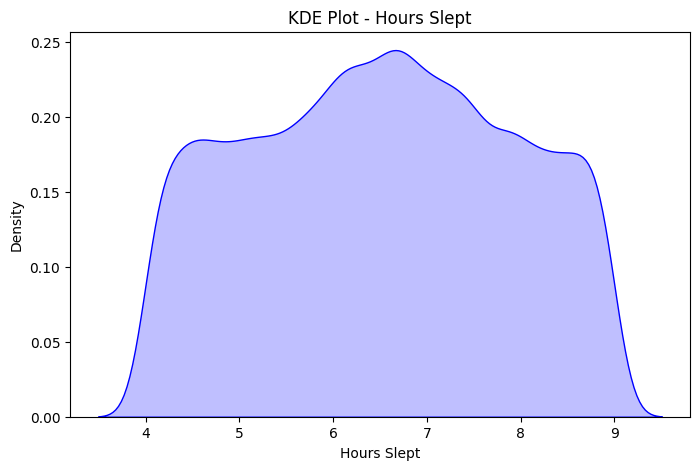

In [17]:
# Numerical variable 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['Hours_Slept'], kde=True)
plt.title("Histogram - Hours Slept")

plt.figure(figsize=(8,5))
sns.kdeplot(df['Hours_Slept'], shade=True, color="blue")
plt.title("KDE Plot - Hours Slept")
plt.xlabel("Hours Slept")
plt.ylabel("Density")
plt.show()


The distribution of hours slept is approximately unimodal and skewed slightly to the left, with a peak around 6.5 to 7 hours, and a broader range of common sleep durations between approximately 5.5 and 8.5 hours.
Unimodal: The plot exhibits a single prominent peak, indicating that there is one primary mode or most frequent value for the hours slept, which appears to be around 6.5 to 7 hours.
Peak and Spread: The highest density (around 0.24) is observed near 6.5-7 hours, suggesting this is the most common duration of sleep. The distribution shows a relatively wide spread, with a significant density of individuals sleeping between approximately 5.5 and 8.5 hours.
Slight Left Skew: While generally symmetric around the peak, the distribution appears to have a slightly longer tail on the left side (lower hours slept) compared to the right side (higher hours slept), indicating a slight negative or left skew. This suggests that while most people sleep around the peak, there might be a tendency for some individuals to sleep a bit less than the central tendency.
Range: The data for hours slept ranges from just above 4 hours to just above 9 hours, with the density dropping significantly at these extremes. This indicates that very short or very long sleep durations are less common within this dataset.

C:\Users\mkiarie\AppData\Local\Temp\ipykernel_33808\1522549693.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Active_Minutes'], shade=True, color="blue")


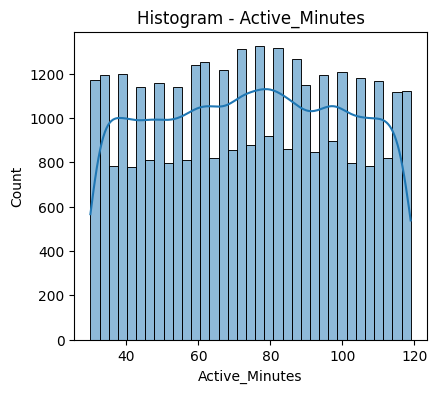

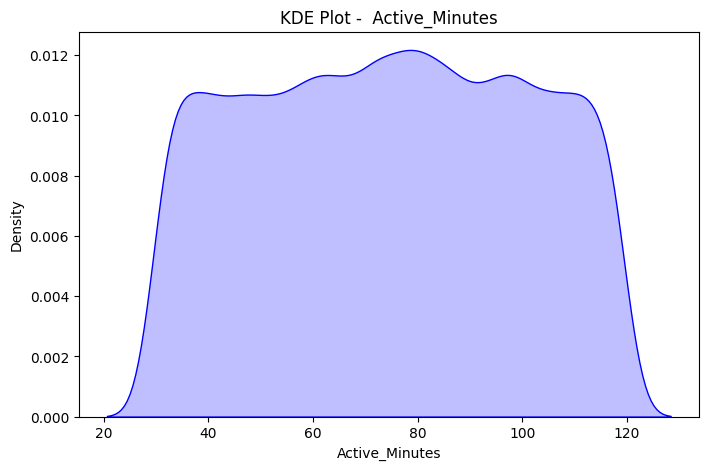

In [18]:
# Numerical variable 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['Active_Minutes'], kde=True)
plt.title("Histogram - Active_Minutes")

plt.figure(figsize=(8,5))
sns.kdeplot(df['Active_Minutes'], shade=True, color="blue")
plt.title('KDE Plot -  Active_Minutes')
plt.xlabel("Active_Minutes")
plt.ylabel("Density")
plt.show()


Shape: The distribution is roughly symmetrical and unimodal, with a peak around 70-90 Active Minutes. It exhibits a somewhat plateau-like shape in the central region, indicating a relatively uniform density of observations within that range. The tails of the distribution fall off sharply at both ends, indicating fewer observations at very low (below 30) and very high (above 110) Active Minutes.
Central Tendency: The highest density of observations appears to be concentrated between approximately 70 and 90 Active Minutes.

C:\Users\mkiarie\AppData\Local\Temp\ipykernel_33808\218942366.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Weight (kg)'], shade=True, color="blue")


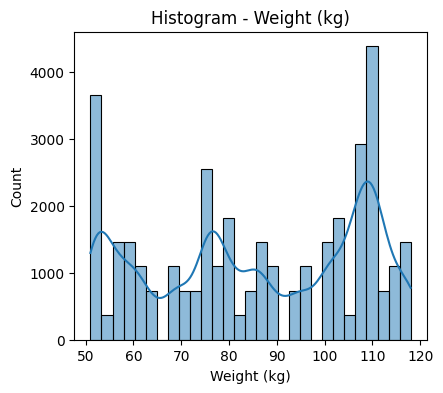

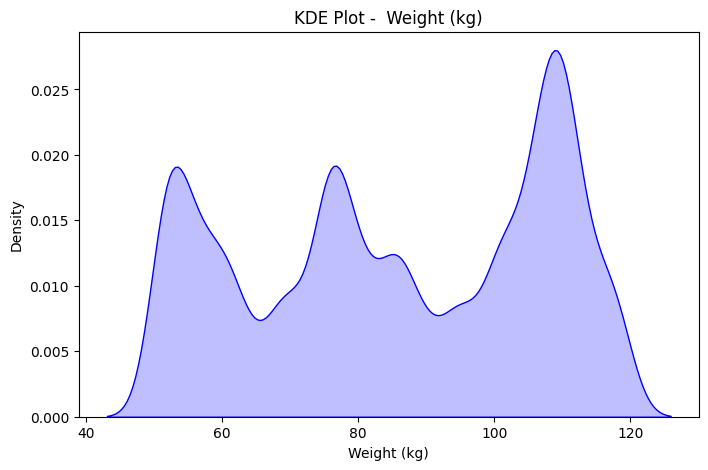

In [19]:
# Numerical variable 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['Weight (kg)'], kde=True)
plt.title("Histogram - Weight (kg)")

plt.figure(figsize=(8,5))
sns.kdeplot(df['Weight (kg)'], shade=True, color="blue")
plt.title('KDE Plot -  Weight (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel("Density")
plt.show()


Bivariate Analysis (Two variables at a time) this is checking the relationships between the behaviors and outcome

         SLEEP & RECOVERY TRENDS

Hours Slept vs Stress → Does sleeping more reduce stress levels?

In [25]:
df.columns.to_list()

['User_ID',
 'Full Name',
 'Date',
 'Age',
 'Gender',
 'Height (cm)',
 'Weight (kg)',
 'Steps_Taken',
 'Calories_Burned',
 'Hours_Slept',
 'Water_Intake (Liters)',
 'Active_Minutes',
 'Heart_Rate (bpm)',
 'Workout_Type',
 'Stress_Level (1-10)',
 'Mood']

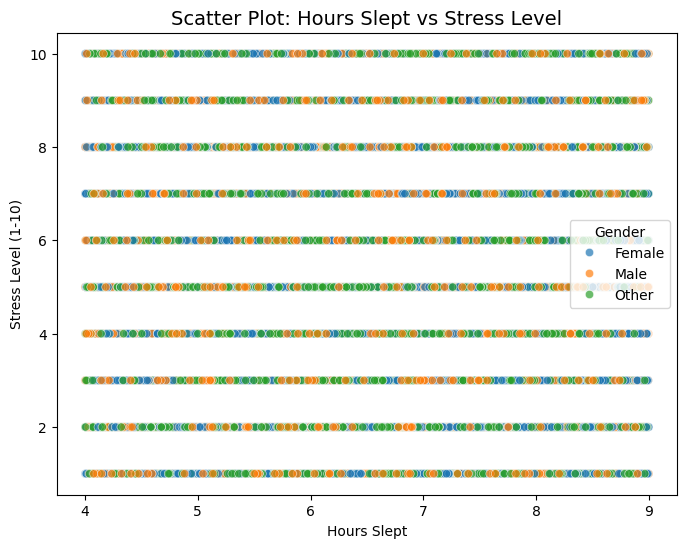

In [29]:
# 'Hours_Slept' against 'Stress_Level (1-10)'
# we will use a scatter plot and regression plot


plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Hours_Slept", y="Stress_Level (1-10)", hue="Gender", alpha=0.7)

plt.title("Scatter Plot: Hours Slept vs Stress Level", fontsize=14)
plt.xlabel("Hours Slept")
plt.ylabel("Stress Level (1-10)")
plt.legend(title="Gender")
plt.show()


Observations:

Discrete Stress Levels:

Stress is measured on a 1–10 scale, so points line up horizontally at each integer (1, 2, 3, …, 10).

That’s why you see horizontal bands of dots.

Distribution of Sleep Hours:

Most people fall between 5–8 hours of sleep, which is common.

Very few data points below 5 or above 9.

No Strong Visible Correlation:

From the scatter, stress does not clearly go up or down as sleep increases.

Stress levels appear spread out across all sleep durations.

Gender Differences:

The colors (Male/Female/Other) are fairly evenly distributed, meaning stress vs sleep is not strongly split by gender.

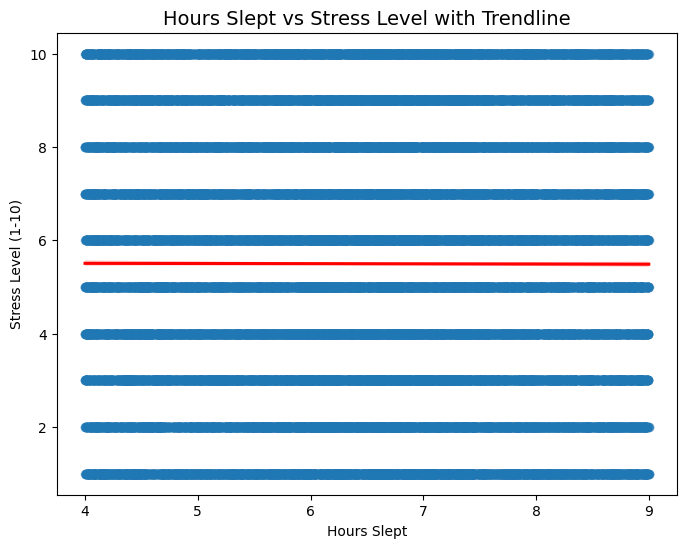

Correlation between Hours Slept and Stress Level: -0.0017945906349781796


In [30]:
#adding a regression line

# Regression plot with trendline
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="Hours_Slept", y="Stress_Level (1-10)", scatter_kws={"alpha":0.4}, line_kws={"color":"red"})

plt.title("Hours Slept vs Stress Level with Trendline", fontsize=14)
plt.xlabel("Hours Slept")
plt.ylabel("Stress Level (1-10)")
plt.show()

# Correlation
corr = df["Hours_Slept"].corr(df["Stress_Level (1-10)"])
print("Correlation between Hours Slept and Stress Level:", corr)


Flat Regression Line (Red Line):

The line is almost horizontal → no increasing or decreasing trend between sleep and stress.

Correlation ≈ 0 (-0.0018):

This is basically no correlation at all.

Sleeping more or less hours does not predict stress level in your dataset.

Discrete Stress Levels:

Stress being on a 1–10 scale makes the scatter look like horizontal bands.

Still valid, but just shows there’s no spread along the vertical axis that matches sleep.

🔎 What This Means:

Sleep hours alone don’t explain stress in your sample.
Stress might be influenced more by other variables (e.g., active minutes, heart rate, mood rating, or steps taken).

           Hours_Slept vs Mood → Boxplot/Violin

C:\Users\mkiarie\AppData\Local\Temp\ipykernel_33808\3331851701.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Mood", y="Hours_Slept", data=df, palette="Set2")


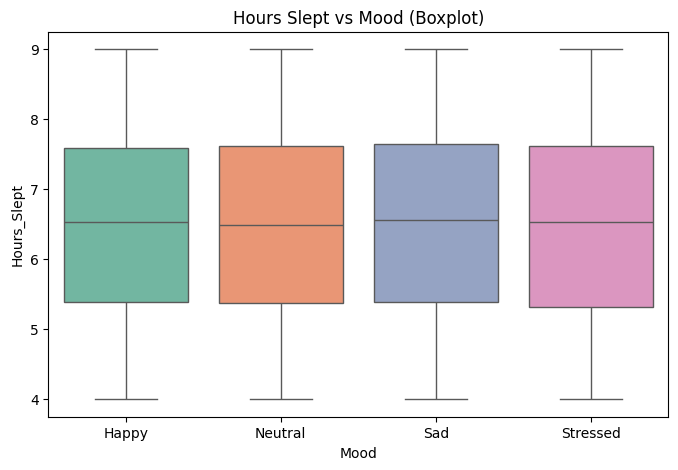

C:\Users\mkiarie\AppData\Local\Temp\ipykernel_33808\3331851701.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Mood", y="Hours_Slept", data=df, palette="Set3")


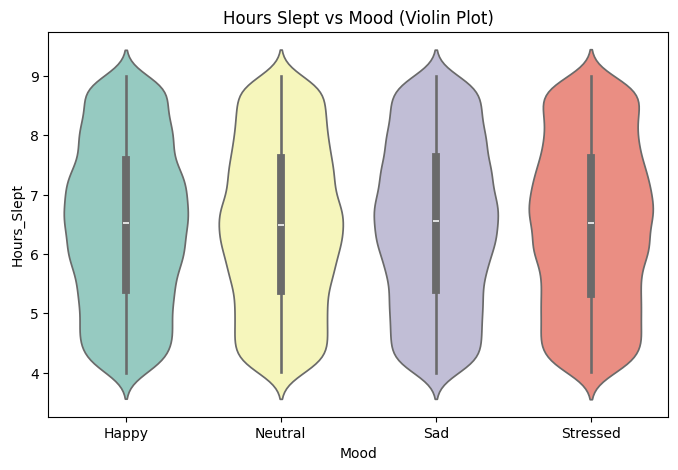

In [31]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x="Mood", y="Hours_Slept", data=df, palette="Set2")
plt.title("Hours Slept vs Mood (Boxplot)")
plt.show()

# Violin plot
plt.figure(figsize=(8,5))
sns.violinplot(x="Mood", y="Hours_Slept", data=df, palette="Set3")
plt.title("Hours Slept vs Mood (Violin Plot)")
plt.show()


(BOXPOLT)
Comparison across Moods:
While the median sleep duration is similar across all moods, the boxplot suggests that individuals who are "Happy" tend to have a slightly higher median sleep duration compared to "Neutral," "Sad," or "Stressed" individuals, although the difference is not substantial.
The overlap in the boxes and whiskers indicates that there's considerable variability in sleep hours within each mood category, and no single mood state is exclusively associated with a significantly longer or shorter sleep duration based on this data.

(VIOLIN)
While all mood categories show a central tendency for hours slept around 6-7 hours, the "Happy" and "Neutral" moods appear to have a more concentrated distribution of sleep duration compared to "Sad" and "Stressed" moods, which exhibit greater variability in hours slept.
The median hours slept appear to be relatively similar across all mood categories, although the spread and density of the distributions differ.

  MULTIVARIATE ANALYSIS 

In [33]:
df.columns.to_list()

['User_ID',
 'Full Name',
 'Date',
 'Age',
 'Gender',
 'Height (cm)',
 'Weight (kg)',
 'Steps_Taken',
 'Calories_Burned',
 'Hours_Slept',
 'Water_Intake (Liters)',
 'Active_Minutes',
 'Heart_Rate (bpm)',
 'Workout_Type',
 'Stress_Level (1-10)',
 'Mood']

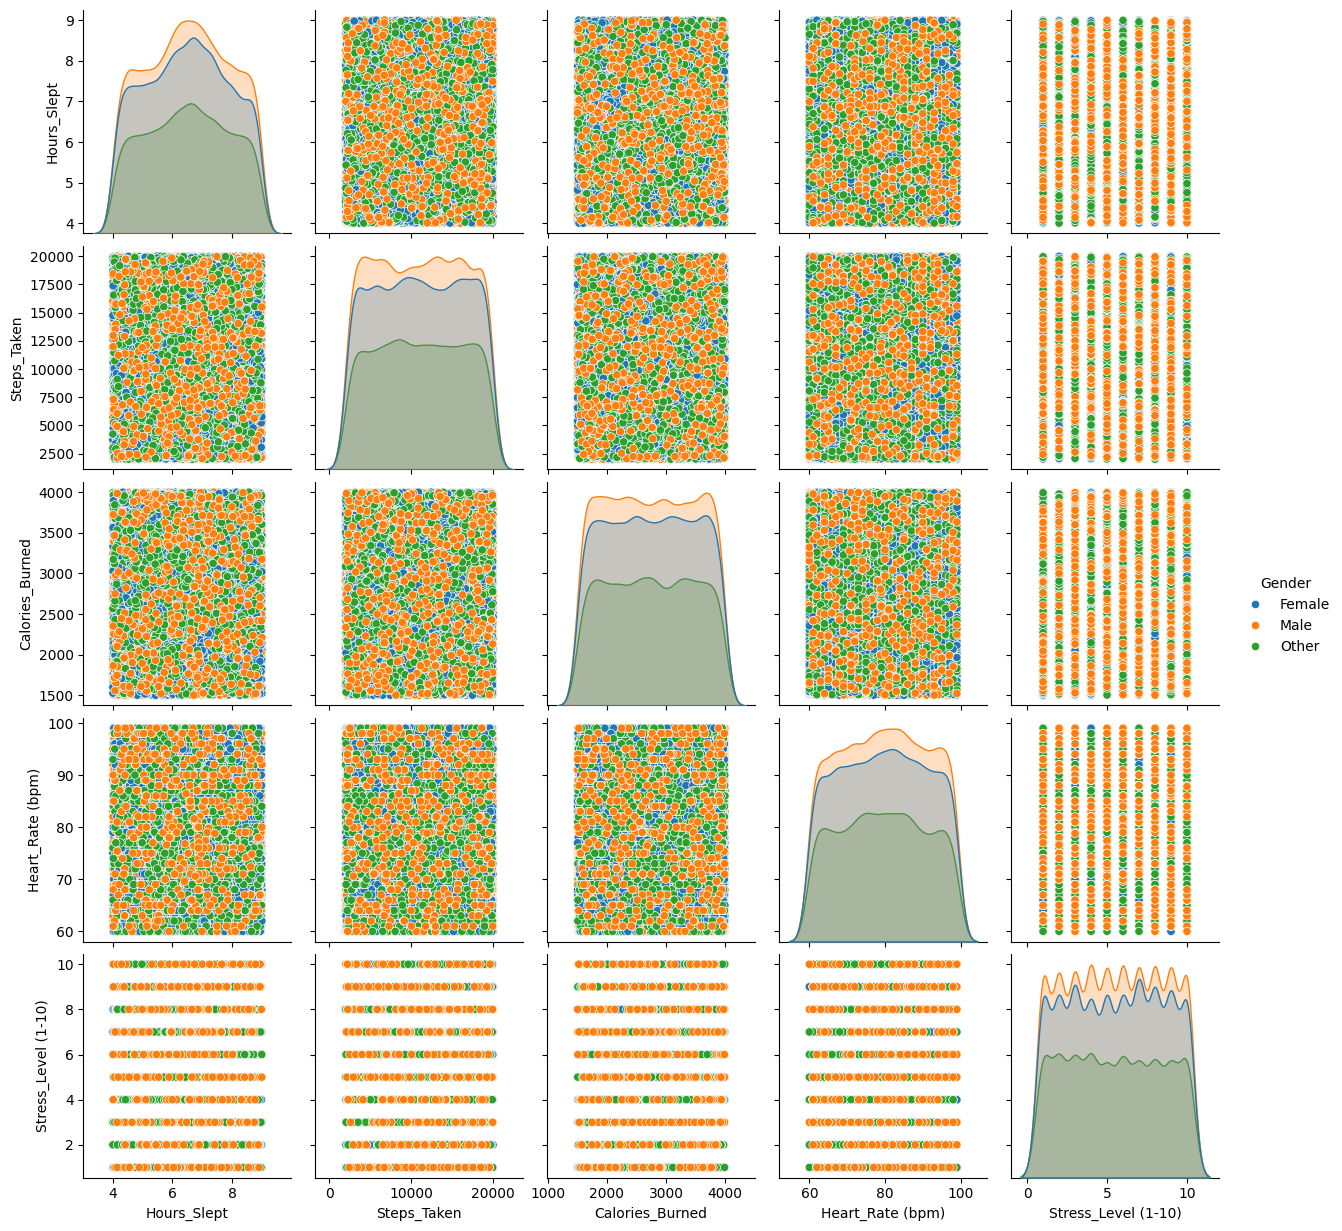

In [36]:
sns.pairplot(
    df[['Hours_Slept', 'Steps_Taken', 'Calories_Burned', 'Heart_Rate (bpm)', 'Stress_Level (1-10)', 'Gender']], 
    hue="Gender"
)
plt.show()


Key Observations:

Distributions: The diagonal plots show the distribution of each individual metric, often with distinct peaks or ranges. For example, "Hours\_Slept" appears to have a relatively normal distribution centered around 7-8 hours, while "Stress\_Level" shows a more uniform distribution across its range.

Gender Differences: The color-coding (Female, Male, Other) reveals variations in the distributions and relationships based on gender. For instance, in the "Hours\_Slept" distribution, there might be slight differences in the peak hours for males and females. Similarly, the scatter plots show how different genders are clustered or dispersed across various metric combinations.

Correlations/Relationships: The off-diagonal scatter plots illustrate potential correlations between pairs of metrics. For example, "Steps\_Taken" and "Calories\_Burned" likely show a strong positive correlation, indicating that more steps generally lead to more calories burned. "Heart\_Rate (bpm)" and "Stress\_Level (1-10)" might also exhibit a positive relationship, where higher stress levels correspond to higher heart rates.
Outliers/Anomalies: The scatter plots can also reveal any potential outliers or unusual data points that deviate significantly from the general patterns.

In summary, this pair plot offers a comprehensive overview of the individual distributions of key health metrics and their interrelationships, while also providing insights into how these metrics vary across different genders within the dataset.

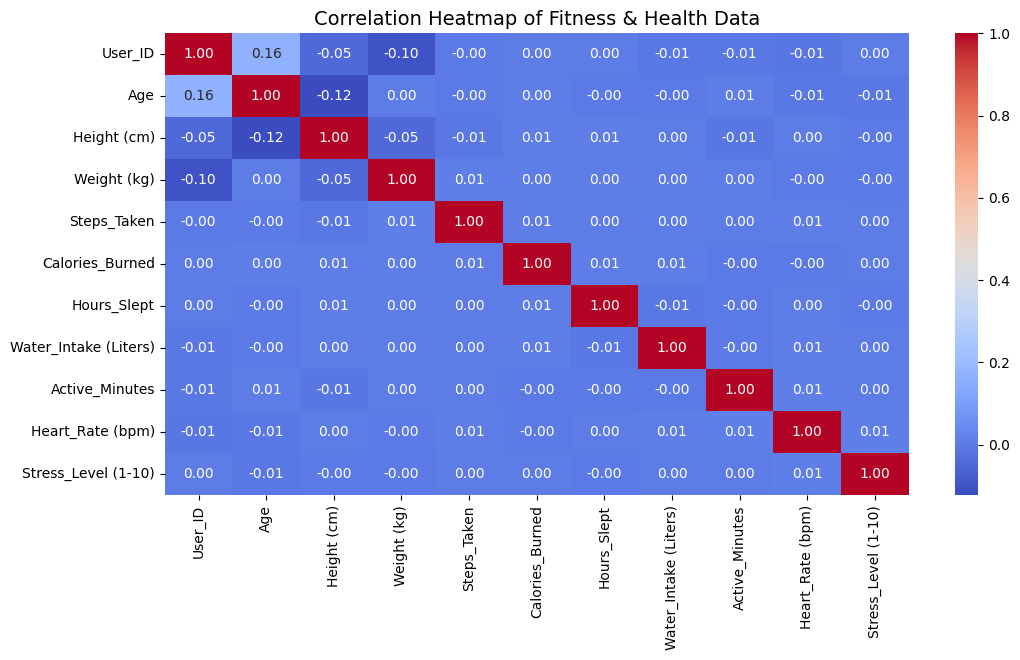

In [37]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Fitness & Health Data", fontsize=14)
plt.show()


SCALING THE DATA

In [21]:
df.head()

User_ID      Full Name       Date  Age  Gender  Height (cm)  Weight (kg)  \
0        1  Sara Martinez 2023-01-01   19  Female          191           80   
1        1  Sara Martinez 2023-01-02   19  Female          191           80   
2        1  Sara Martinez 2023-01-03   19  Female          191           80   
3        1  Sara Martinez 2023-01-04   19  Female          191           80   
4        1  Sara Martinez 2023-01-05   19  Female          191           80   

   Steps_Taken  Calories_Burned  Hours_Slept  Water_Intake (Liters)  \
0        11405             1862     7.021201               3.440508   
1         7010             1806     4.850156               3.103590   
2        18942             2274     8.167817               3.814843   
3        13778             2656     7.453552               3.508636   
4        10247             3571     5.132654               2.704800   

   Active_Minutes  Heart_Rate (bpm) Workout_Type  Stress_Level (1-10)     Mood  
0            80.0              84.0         Yoga                    2    Happy  
1            47.0              72.0       Cardio                    9  Neutral  
2            46.0              85.0         Yoga                    6      Sad  
3           105.0              77.0         Yoga                    2      Sad  
4            53.0              61.0         Yoga                    8      Sad

In [22]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

#categorical variables in the same dataframe:
df_final = pd.concat([df_scaled, df.drop(columns=numeric_cols)], axis=1)


In [23]:
df_final.head()

User_ID       Age  Height (cm)  Weight (kg)  Steps_Taken  Calories_Burned  \
0 -1.714816 -1.766875     1.268552    -0.270319     0.071089        -1.223655   
1 -1.714816 -1.766875     1.268552    -0.270319    -0.773584        -1.301019   
2 -1.714816 -1.766875     1.268552    -0.270319     1.519621        -0.654471   
3 -1.714816 -1.766875     1.268552    -0.270319     0.527154        -0.126734   
4 -1.714816 -1.766875     1.268552    -0.270319    -0.151467         1.137350   

   Hours_Slept  Water_Intake (Liters)  Active_Minutes  Heart_Rate (bpm)  \
0     0.375491               1.036955        0.213610          0.390138   
1    -1.199602               0.539909       -1.077422         -0.670904   
2     1.207360               1.589199       -1.116544          0.478558   
3     0.689161               1.137461        1.191665         -0.228803   
4    -0.994649              -0.048414       -0.842689         -1.643526   

   Stress_Level (1-10)      Full Name       Date  Gender Workout_Type     Mood  
0            -1.214433  Sara Martinez 2023-01-01  Female         Yoga    Happy  
1             1.214946  Sara Martinez 2023-01-02  Female       Cardio  Neutral  
2             0.173784  Sara Martinez 2023-01-03  Female         Yoga      Sad  
3            -1.214433  Sara Martinez 2023-01-04  Female         Yoga      Sad  
4             0.867892  Sara Martinez 2023-01-05  Female         Yoga      Sad